<a href="https://colab.research.google.com/github/nathanschoeck/Computer-Vision/blob/main/Face_Detection_using_Nearest_Neighbor_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

he Nearest Neighbor Classifier (NNC) for face detection is a simple algorithm that uses a dataset of labeled face images. It classifies a test image by finding the training image that is the closest (most similar) in terms of some distance metric, typically Euclidean distance. Below is Python code for implementing a Nearest Neighbor Classifier for face detection.

1. Import libraries

In [4]:
import cv2
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt

2. Preprocess image function

In [5]:
def preprocess_image(image_path, target_size=(64, 64)):
    """
    Preprocesses an image by resizing and converting it to grayscale.

    Args:
        image_path: Path to the input image.
        target_size: Desired size of the output image (width, height).

    Returns:
        Preprocessed image (flattened into a 1D array).
    """
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image_resized = cv2.resize(image, target_size)
    return image_resized.flatten()

3. Nearest neighbor classifier function

In [6]:
def nearest_neighbor_classifier(test_image, training_data, training_labels):
    """
    Classifies a test image using the nearest neighbor classifier.

    Args:
        test_image: Flattened test image (1D NumPy array).
        training_data: Array of training images (each flattened into a 1D array).
        training_labels: Labels corresponding to the training images.

    Returns:
        Predicted label for the test image.
    """
    # Compute Euclidean distances between the test image and all training images
    distances = euclidean_distances([test_image], training_data)

    # Find the index of the nearest neighbor
    nearest_neighbor_index = np.argmin(distances)

    # Return the label of the nearest neighbor
    return training_labels[nearest_neighbor_index]

4. Load training data

In [7]:
face_image_paths = ["/face1.jpg", "/face2.jpg", "/face3.jpg"]
non_face_image_paths = ["/nonface1.jpg", "/nonface2.jpg", "/nonface3.jpg"]

training_images = []
training_labels = []

5. Label faces as 1 and non-faces as 0

In [8]:
for path in face_image_paths:
    training_images.append(preprocess_image(path))
    training_labels.append(1)

for path in non_face_image_paths:
    training_images.append(preprocess_image(path))
    training_labels.append(0)

6. Convert training data and labels to NumPy arrays

In [9]:
training_images = np.array(training_images)
training_labels = np.array(training_labels)

7. Load and preprocess the test image

In [10]:
test_image_path = "/women.jpg"
test_image = preprocess_image(test_image_path)

8. Classify the test image

In [11]:
predicted_label = nearest_neighbor_classifier(test_image, training_images, training_labels)

9. Display the result

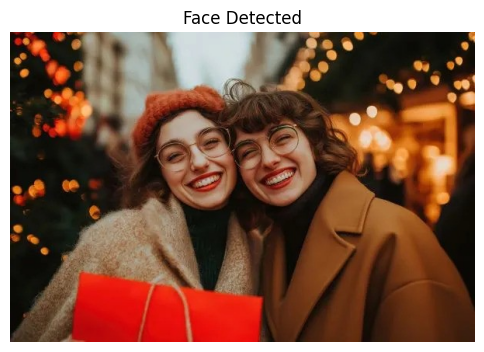

In [12]:
result_text = "Face Detected" if predicted_label == 1 else "No Face Detected"
test_image_display = cv2.imread(test_image_path)

plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(test_image_display, cv2.COLOR_BGR2RGB))
plt.title(result_text)
plt.axis("off")
plt.show()